In [537]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, roc_auc_score

In [538]:
df=pd.read_csv("D:/Final Project/train.csv")

In [539]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [541]:
df.drop_duplicates().shape

(45205, 11)

In [542]:
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [543]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [544]:
df.age.value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [545]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [546]:
df.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [547]:
df.education_qual.value_counts()

education_qual
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [548]:
df.call_type.value_counts()

call_type
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [549]:
df.prev_outcome.value_counts()

prev_outcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [550]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

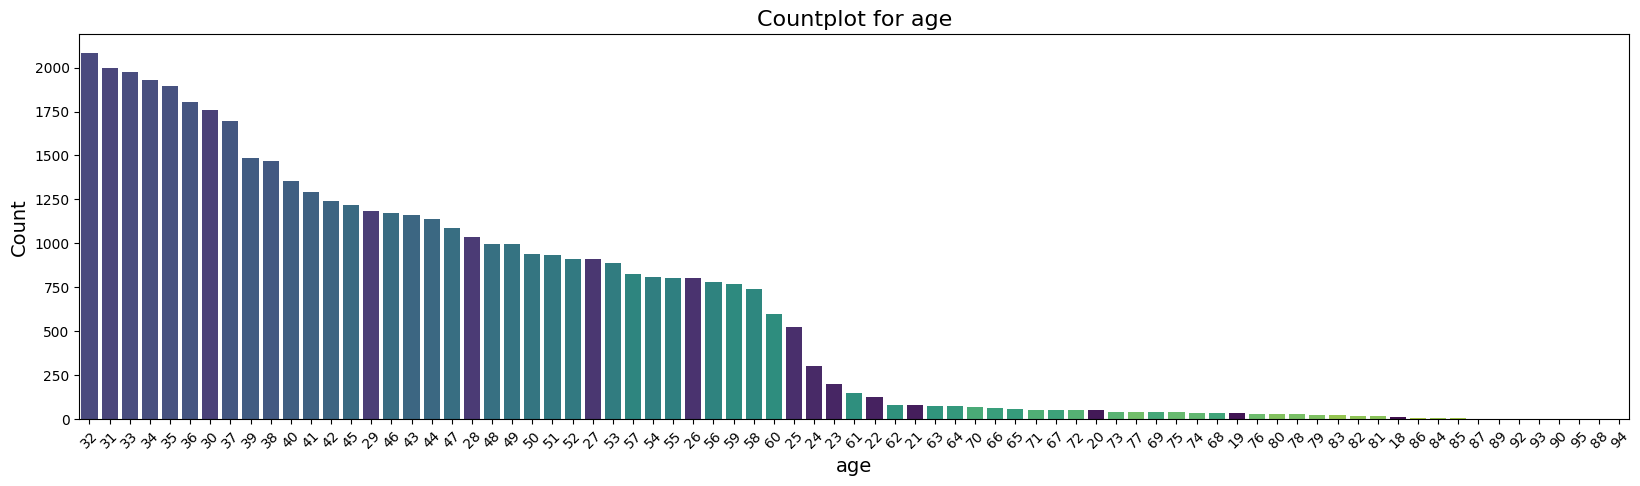

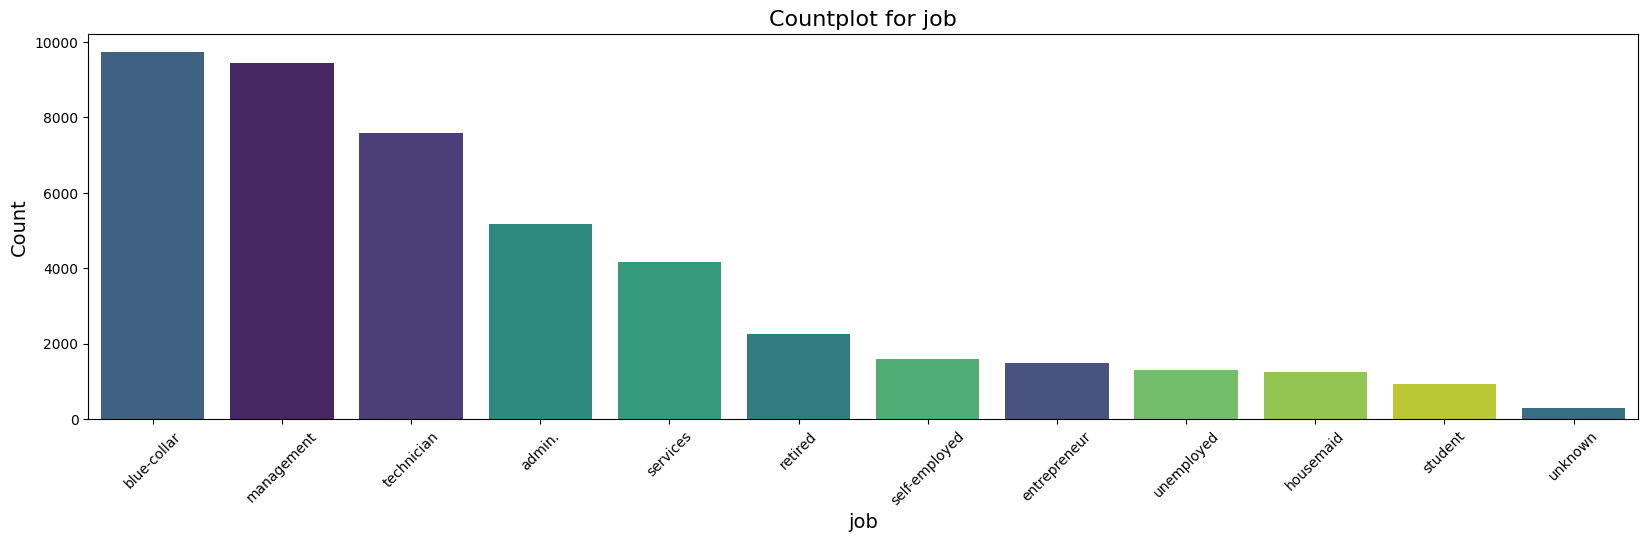

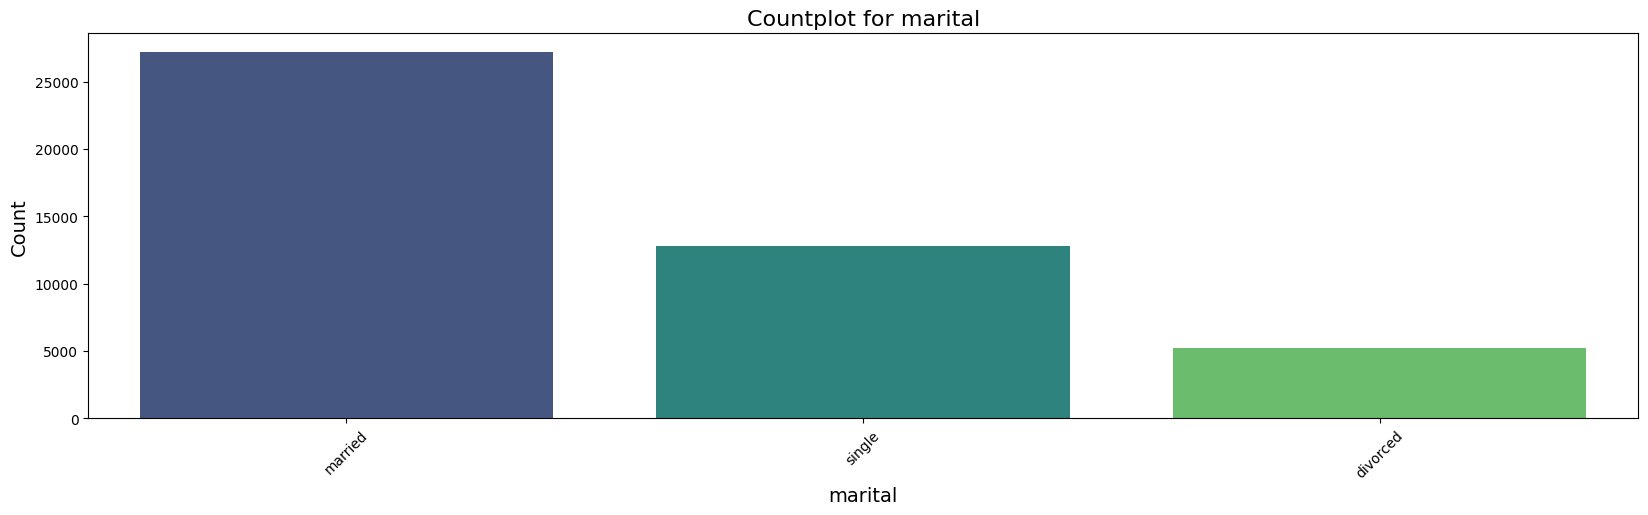

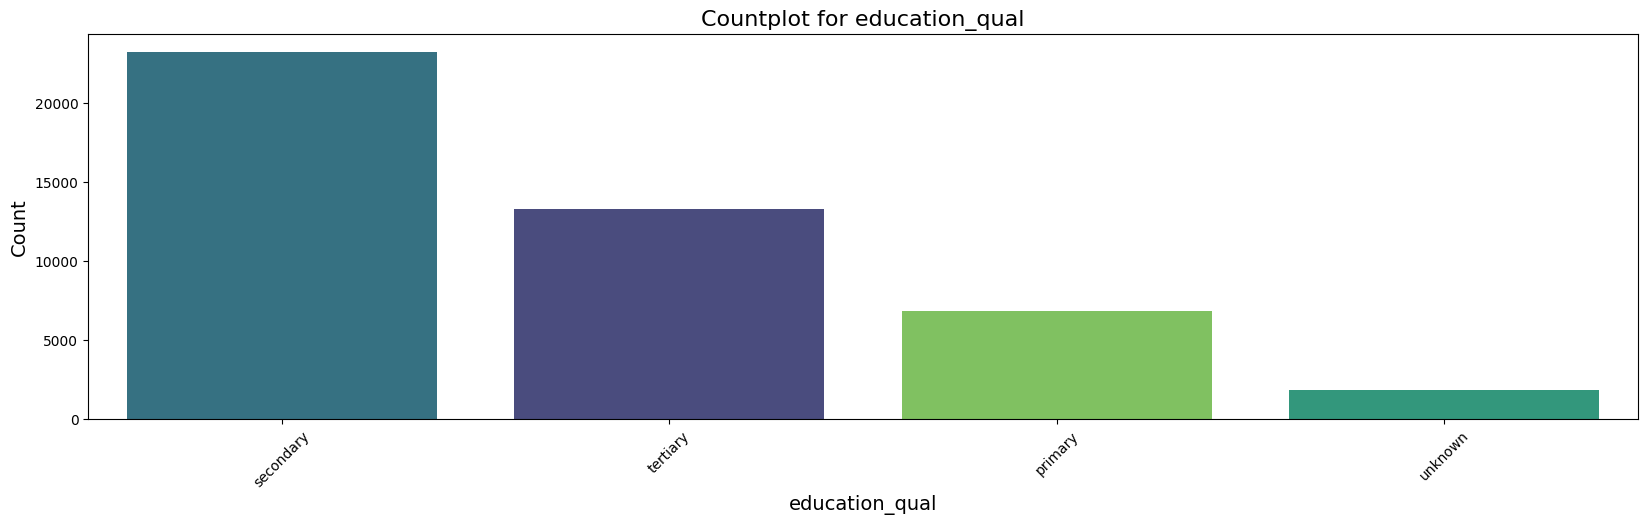

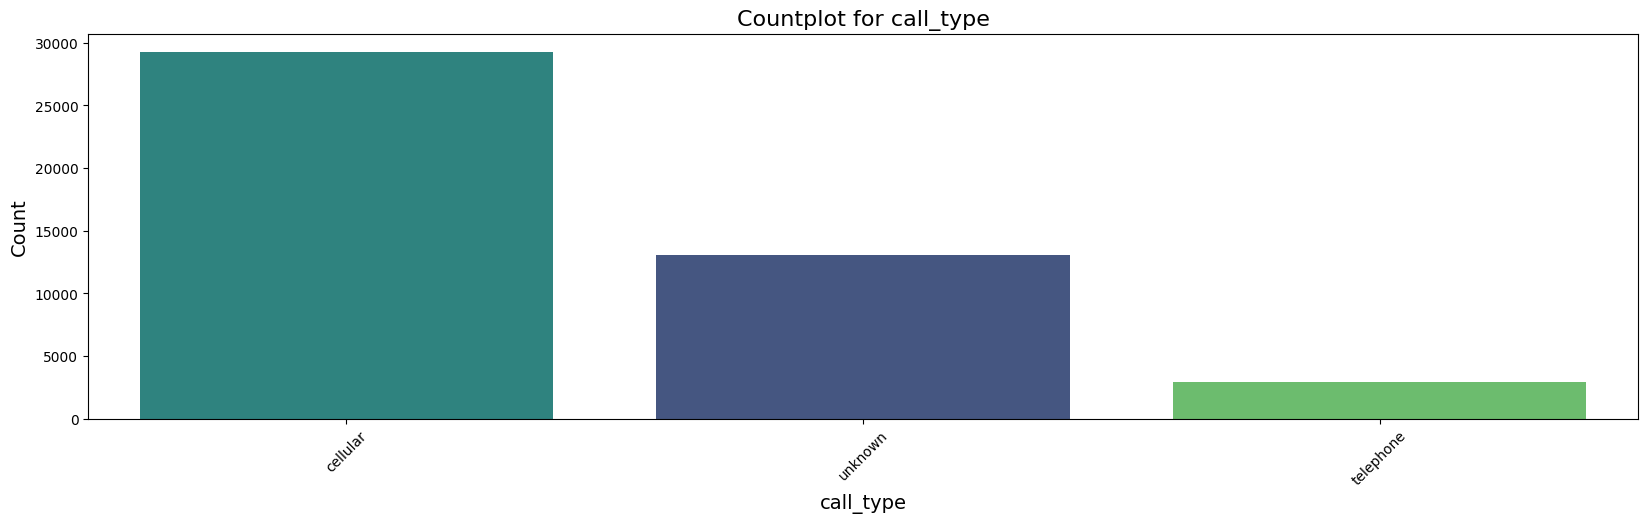

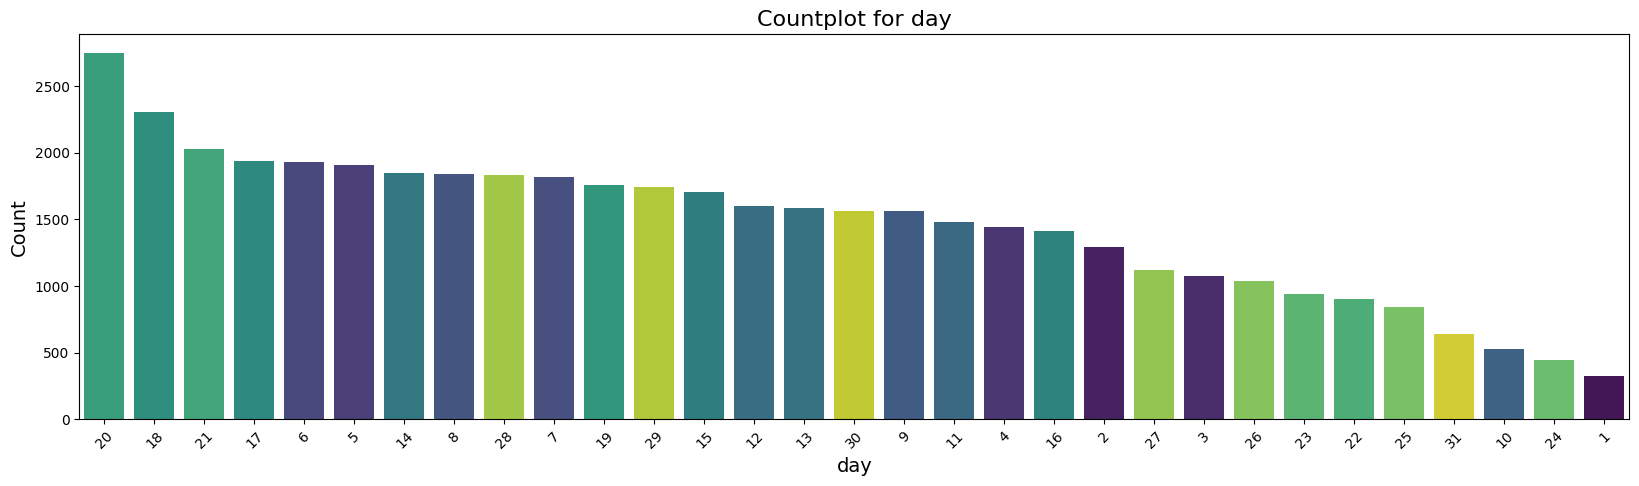

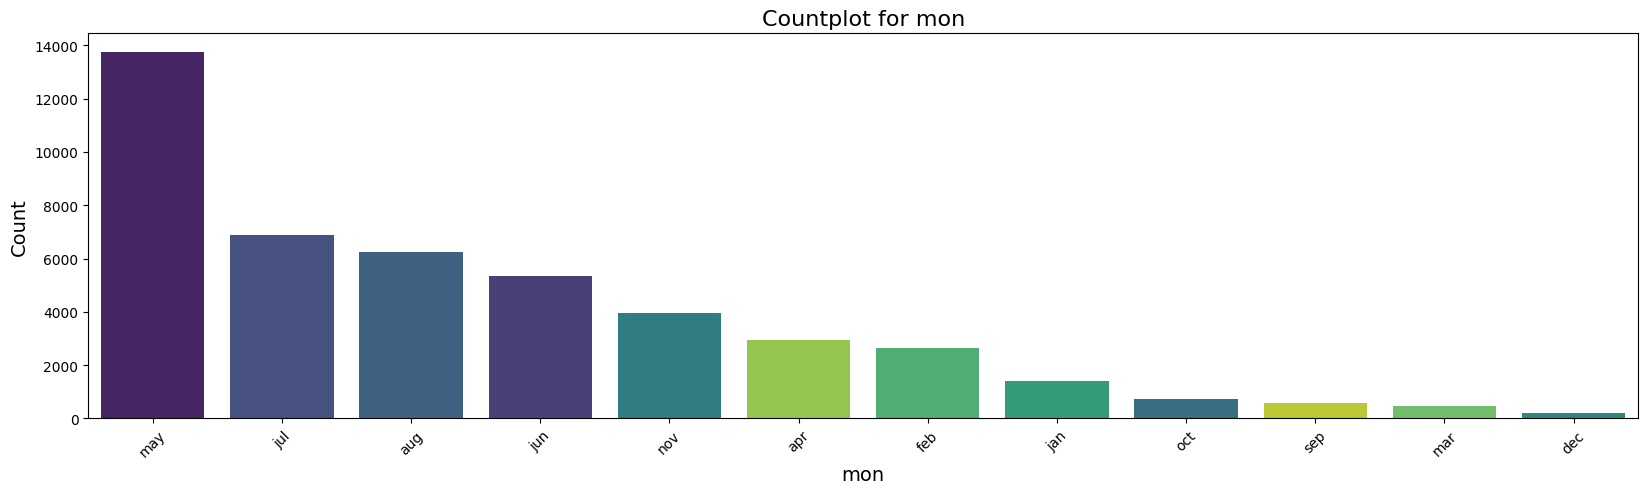

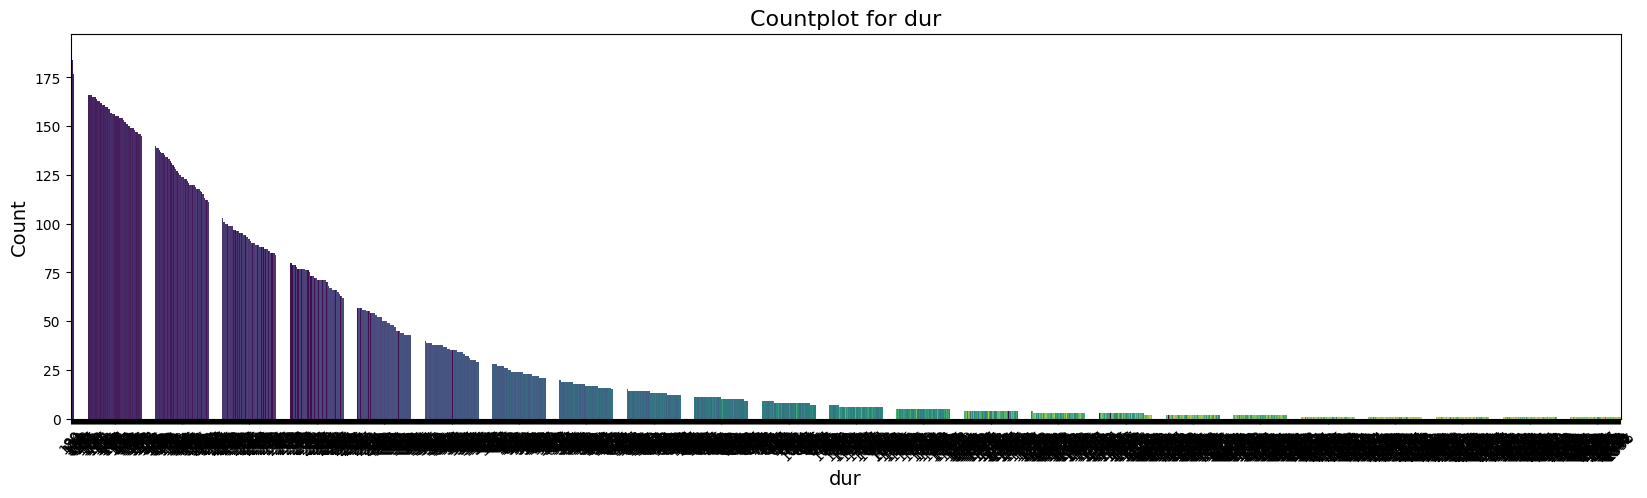

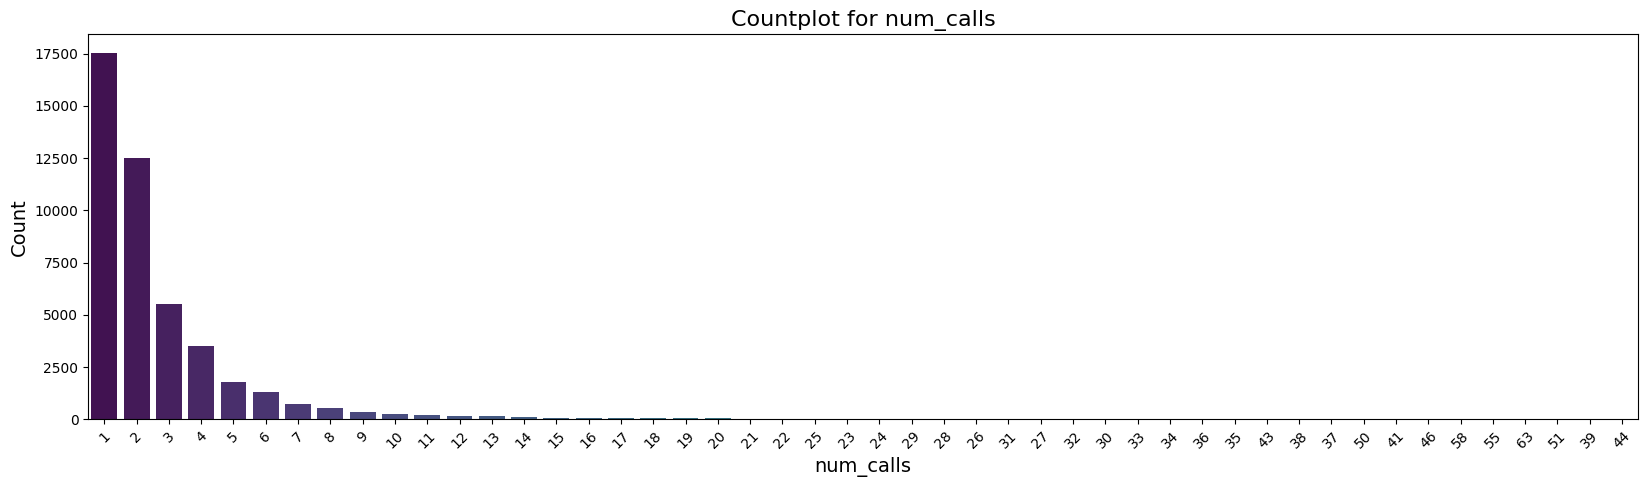

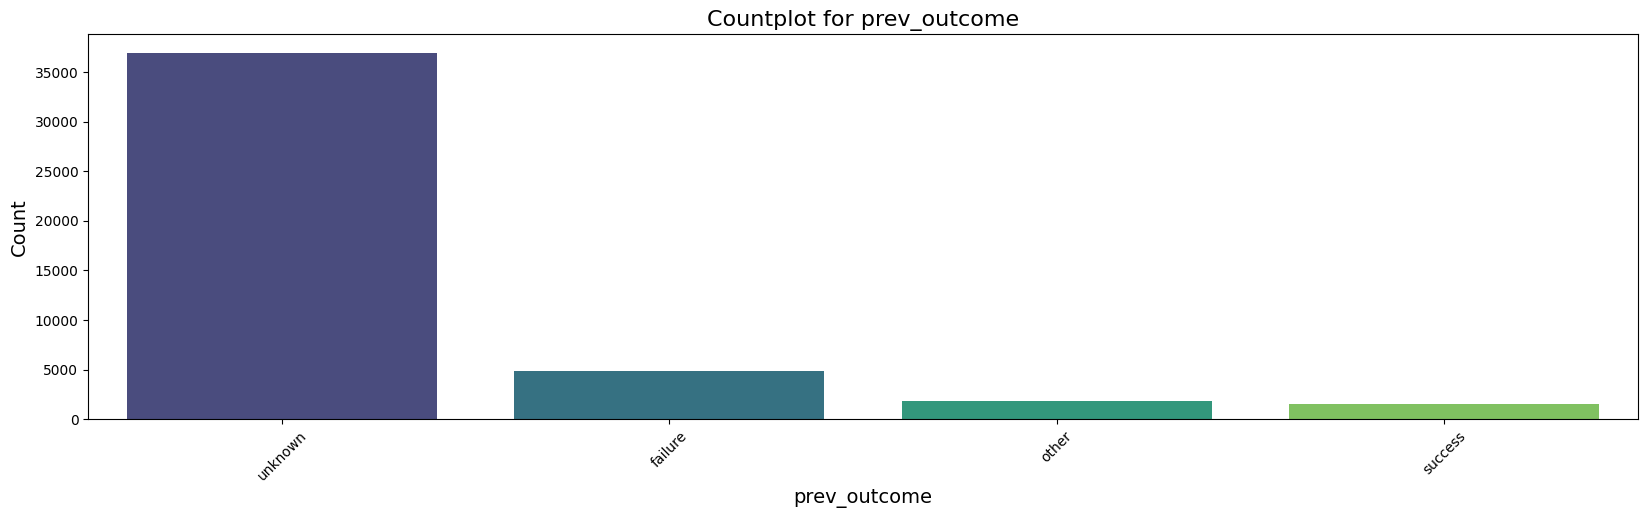

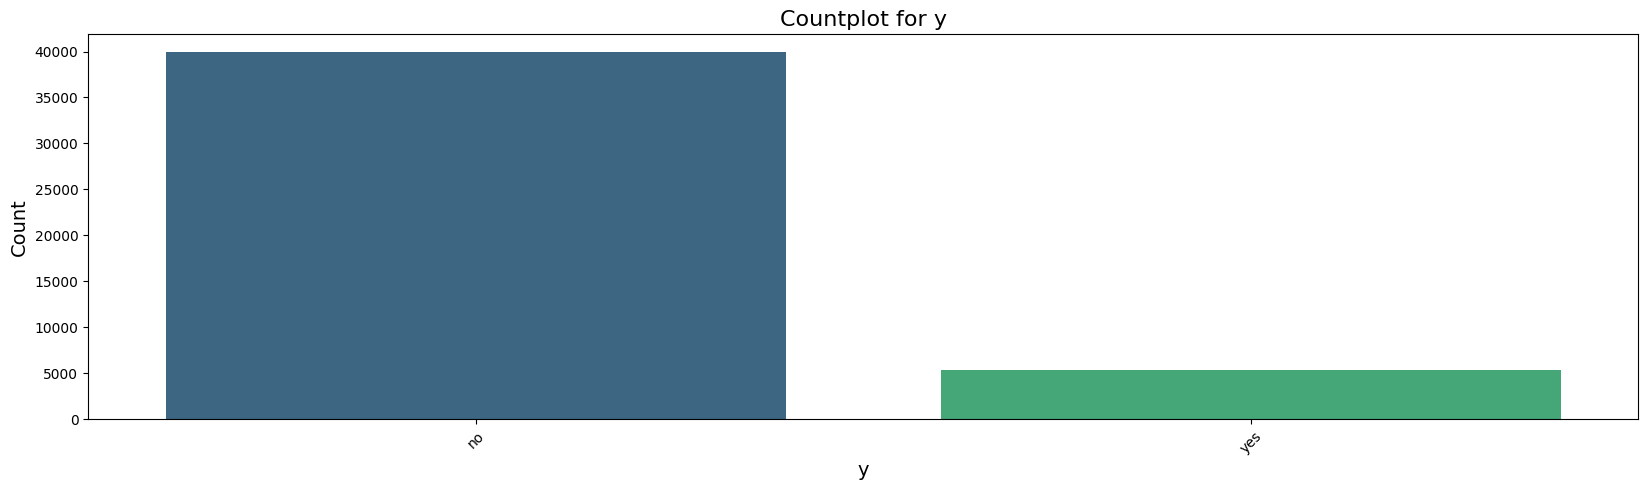

In [551]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:
    plt.figure(figsize=(20, 5))
    
    # Determine the order of the categories (e.g., ascending order by count)
    order = df[i].value_counts().index
    
    # Choose a color palette (e.g., "viridis" or any palette you prefer)
    palette = sns.color_palette("viridis", len(order))
    
    sns.countplot(x=df[i], order=order, palette=palette, hue=df[i], legend=False)
    
    # Add titles and labels for better visualization
    plt.title(f'Countplot for {i}', fontsize=16)
    plt.xlabel(i, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()



<Axes: xlabel='dur', ylabel='Count'>

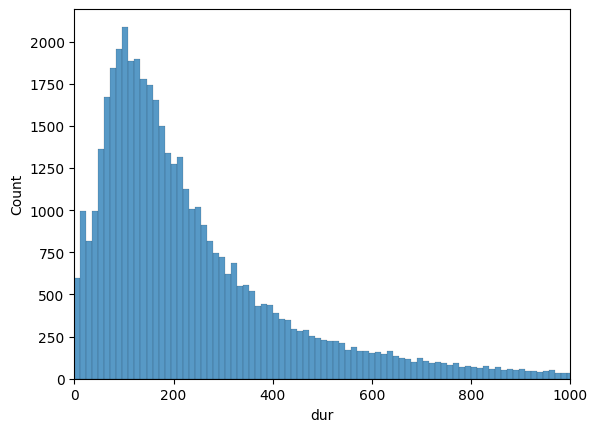

In [552]:

fig, ax = plt.subplots()

b = sns.histplot(df.dur, ax=ax)
ax.set_xlim(0, 1000)
b
     

OBSERVATIONS

What the Insurance Company has done so far:

    Middle-aged men (i.e., 30–35 years old) are targeted more frequently.
    Blue-collar and management-level people are targeted the most.
    More calls are made to married individuals.
    People with secondary education are contacted more often.
    Cellular calls are used more frequently than other types.
    The highest number of calls were made on the 20th day of the month.
    A significantly higher number of calls were made in May compared to any other month.
    Most individuals were contacted only once, with an average number of 3 calls per person.
    The outcome of most previous calls is unknown.
    The mean duration of the calls is 100 seconds.
    Only a few people have subscribed to the insurance, indicating the data is highly imbalanced.

In [553]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


Outlier

In [554]:
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    sns.boxplot(y=df)
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    # Create a boxplot for the specified column
    sns.boxplot(y=df[column])

    # Set the title for the plot
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()

    # Show the plot
    plt.show()


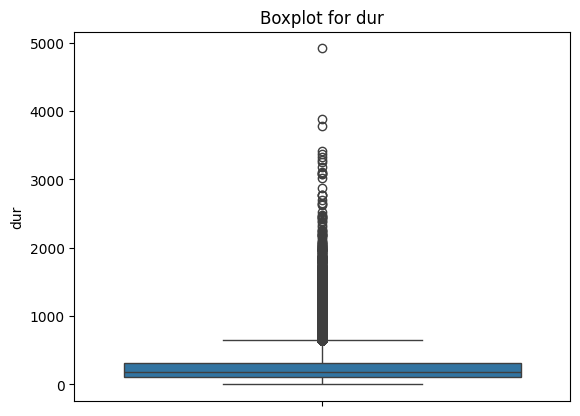

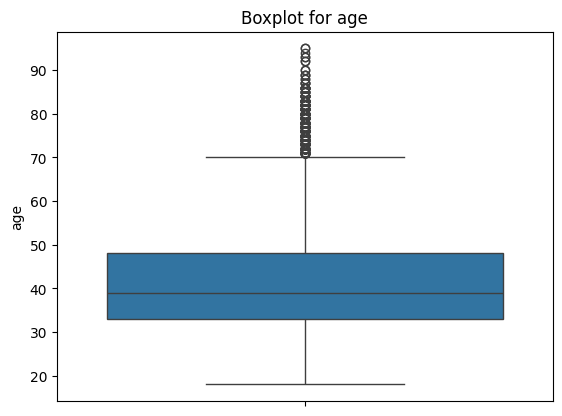

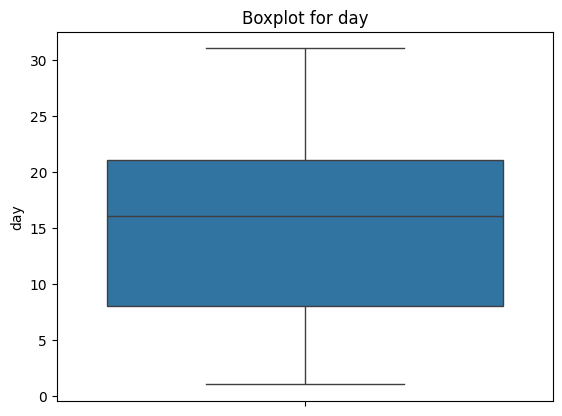

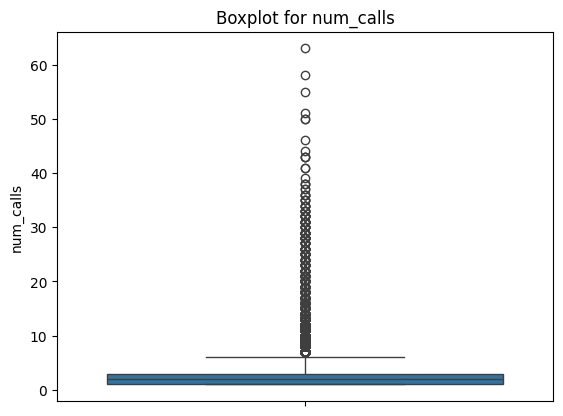

In [555]:
box(df, "dur")
box(df, 'age')  # For example, to plot the boxplot of 'quantity tons'
box(df, 'day')
box(df, 'num_calls')



In [556]:
df['dur'].unique()




array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [557]:
df['dur'].describe(percentiles=[0.9,0.75,0.95,1])

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
50%        180.000000
75%        319.000000
90%        548.000000
95%        751.000000
100%      4918.000000
max       4918.000000
Name: dur, dtype: float64

In [558]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [559]:
df['num_calls'].describe(percentiles=[0.9,0.75,0.95,1,0.98,0.99])

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
50%          2.000000
75%          3.000000
90%          5.000000
95%          8.000000
98%         12.000000
99%         16.000000
100%        63.000000
max         63.000000
Name: num_calls, dtype: float64

In [560]:
df['age'].describe(percentiles=[0.9,0.75,0.95,1])

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
50%         39.000000
75%         48.000000
90%         56.000000
95%         59.000000
100%        95.000000
max         95.000000
Name: age, dtype: float64

In [561]:
def outlier(df, column):
    # Custom IQR calculation with 0.95 instead of 0.75
    iqr = df[column].quantile(0.95) - df[column].quantile(0.25)
    
    # Custom thresholds based on 0.95
    upper_threshold = df[column].quantile(0.95) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    
    # Clip values
    df[column] = df[column].clip(lower_threshold, upper_threshold)
   


In [562]:
#outlier(df, "dur")
#outlier(df, "num_calls")


In [563]:
df['dur'].describe(percentiles=[0.9,0.75,0.95,1])


count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
50%        180.000000
75%        319.000000
90%        548.000000
95%        751.000000
100%      4918.000000
max       4918.000000
Name: dur, dtype: float64

In [564]:
def outlier(df, column):
    # Custom IQR calculation with 0.95 instead of 0.75
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    
    # Custom thresholds based on 0.95
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    
    # Clip values
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [565]:

#outlier(df, "age")


In [566]:
df['age'].describe(percentiles=[0.9,0.75,0.95,1])

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
50%         39.000000
75%         48.000000
90%         56.000000
95%         59.000000
100%        95.000000
max         95.000000
Name: age, dtype: float64

In [567]:
df.y = df.y.map({'no':0,'yes':1})

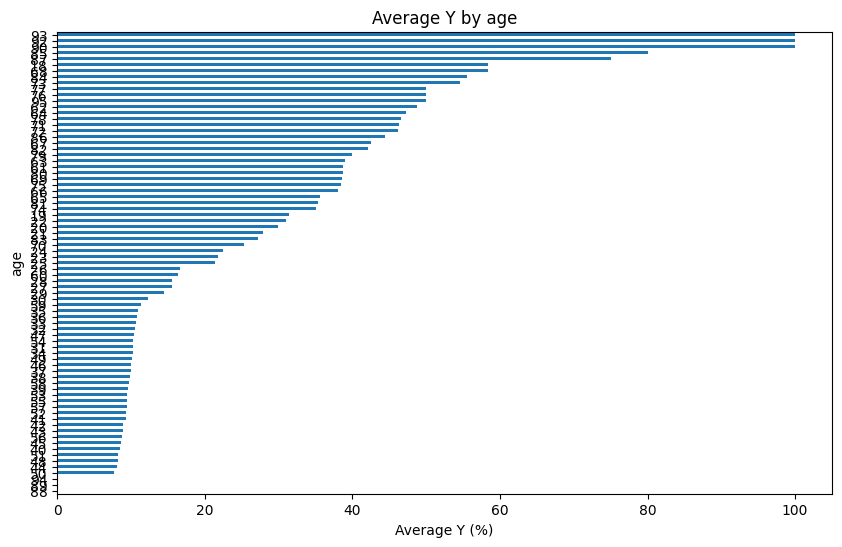

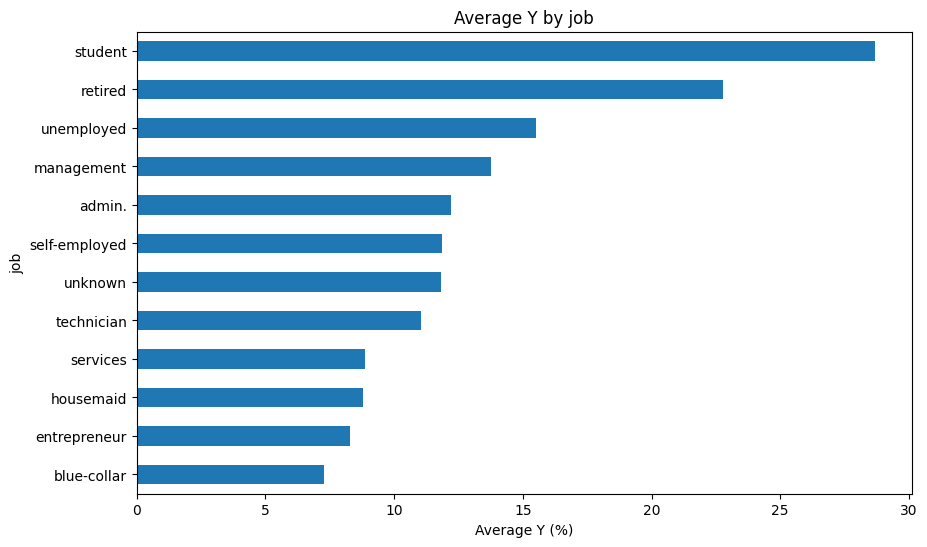

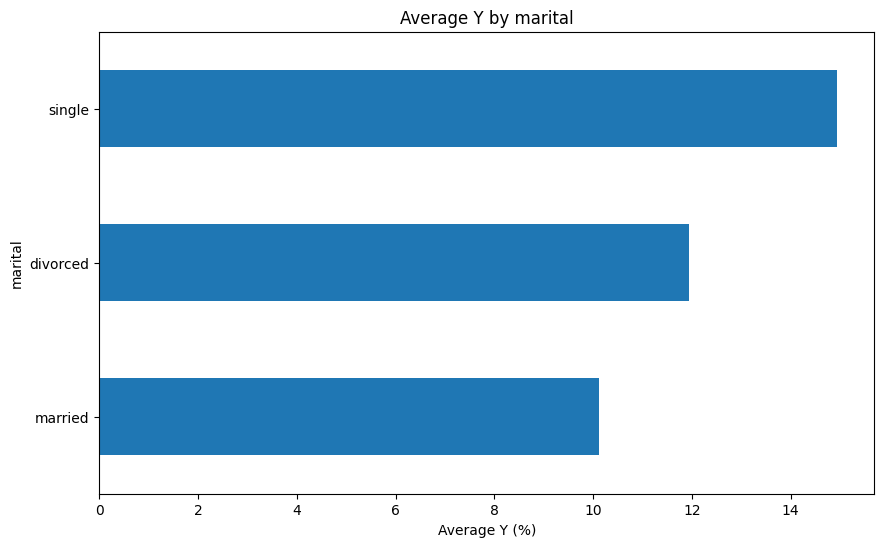

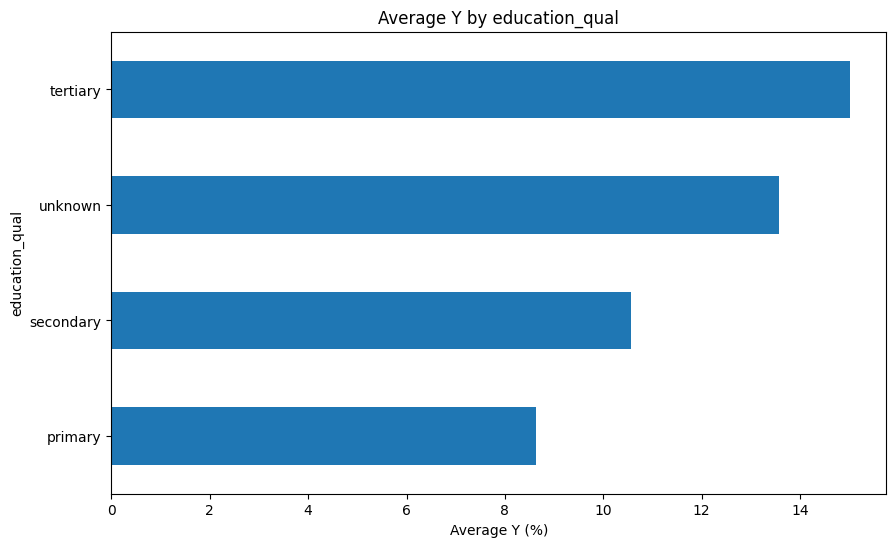

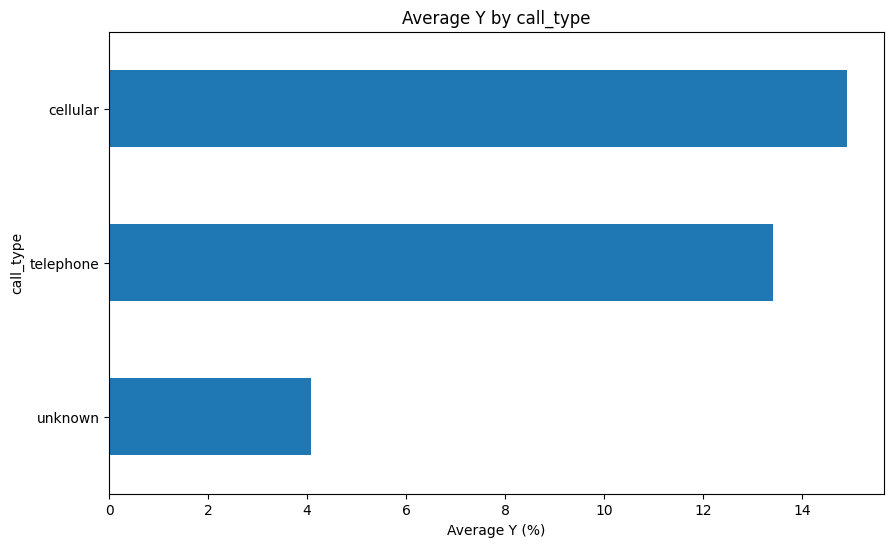

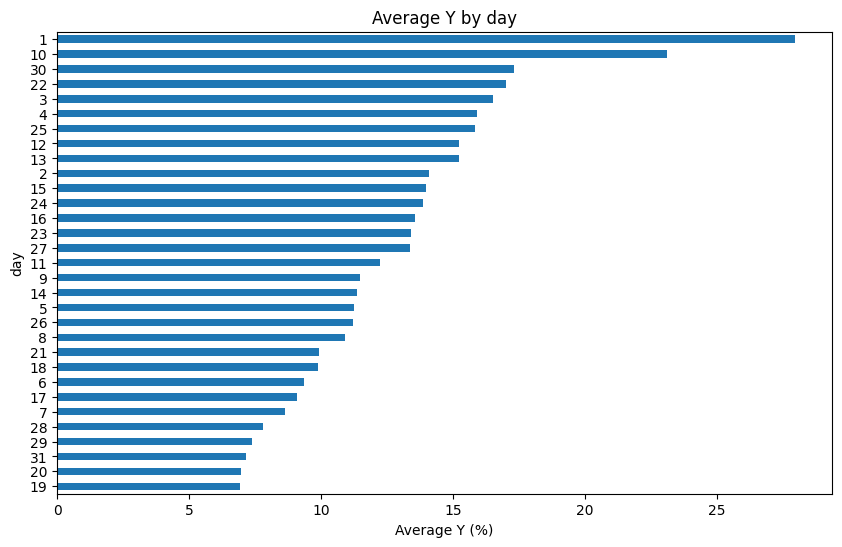

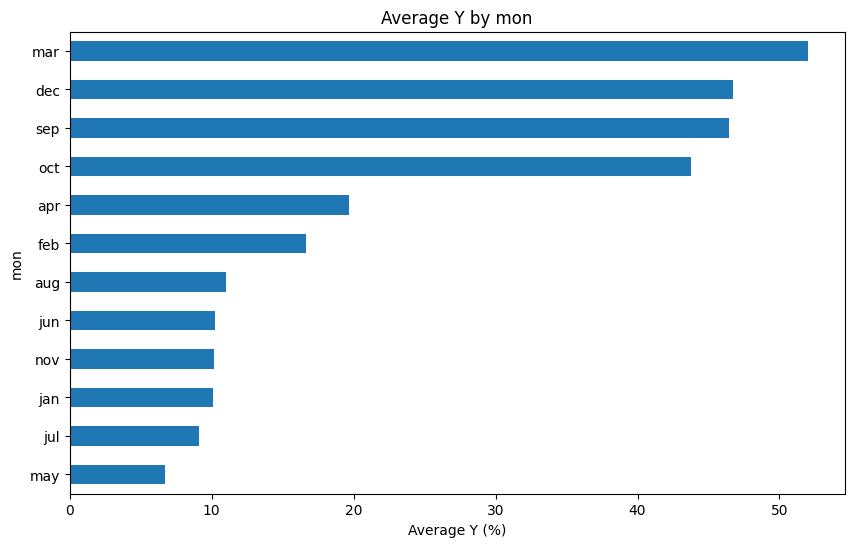

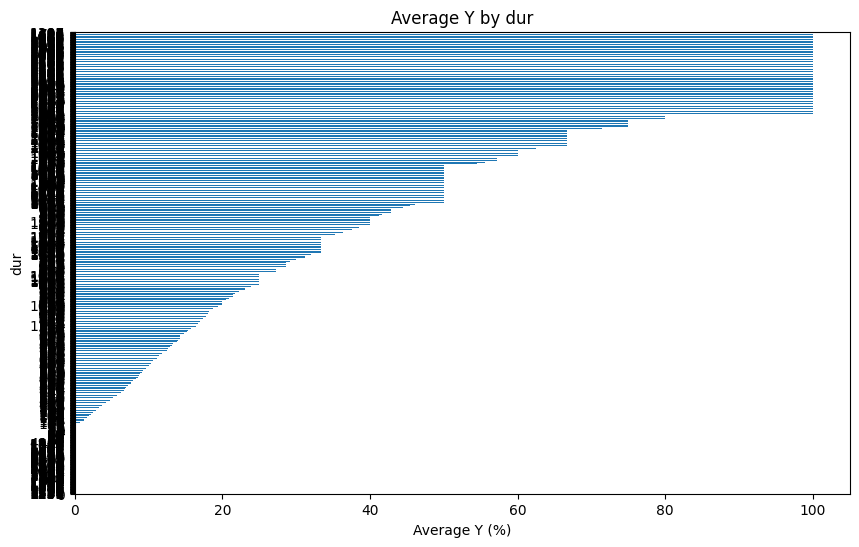

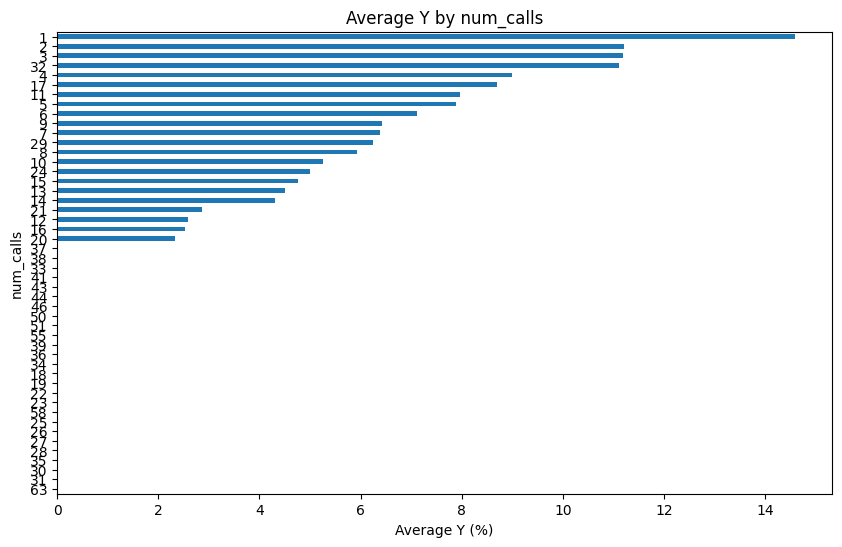

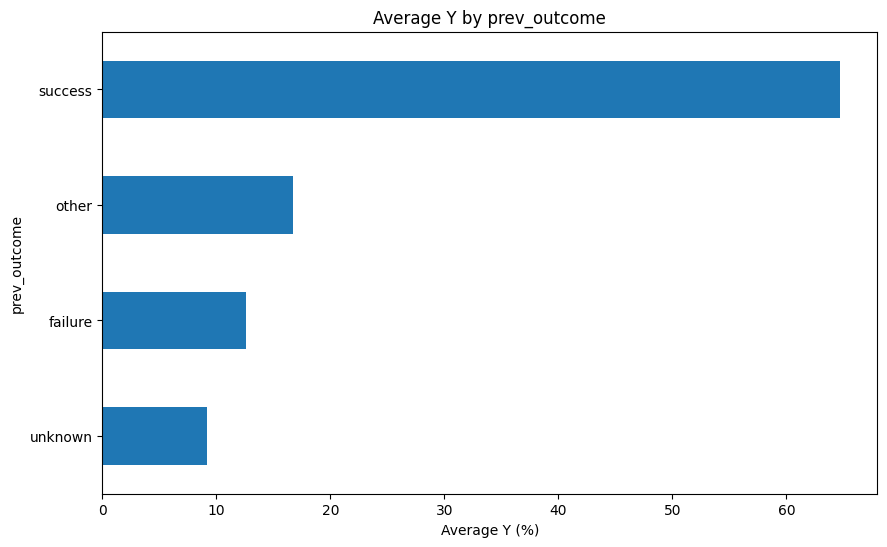

In [568]:
import seaborn as sns
import matplotlib.pyplot as plt

def barplot(df):
    for col in df.columns:
        if col != "y":  # Avoid plotting "y" against itself
            plt.figure(figsize=(10, 6))  # Adjust figure size as needed
            (df.groupby(col)['y'].mean() * 100).sort_values().plot(kind='barh')
            plt.title(f"Average Y by {col}")
            plt.xlabel("Average Y (%)")
            plt.ylabel(col)
            plt.show()

# Assuming your DataFrame is named 'data' (replace with your actual name)
barplot(df)

Analysis:

    People aged 85-95 have subscribed more to the insurance.
    Students have subscribed more to the insurance.
    Singles have subscribed more to the insurance.
    People with tertiary education have purchased more insurance.
    Cellular calls have resulted in more conversions.
    More people have purchased the insurance on the 1st day of the month.
    The highest conversion rate is observed in the month of March.
    Most customers have purchased it after just one call.
    The minimum duration of the call should be 200 seconds.
    If the previous outcome of the call was successful, the customer is more likely to convert.

Inference (What the Company Must Do)

    The insurance company should target more elderly individuals.
    The company must engage more with students than with blue-collar or management workers.
    The company should focus more on singles.
    The company should try to make more calls on the 1st day of the month.
    The company should put in more effort during the month of March than in May.

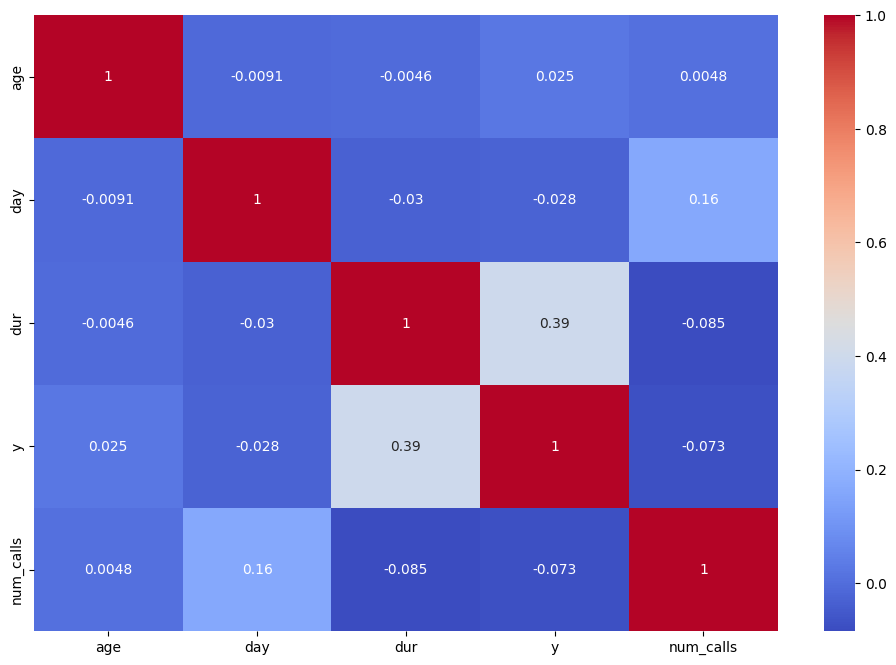

In [569]:
col = df[["age", "day", "dur","y","num_calls"]]  # Select the columns "age", "day", and "dur"

# Calculate the correlation matrix for the selected columns
df_heatmap = col.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(df_heatmap, annot=True, cmap='coolwarm')  # Generate the heatmap with annotations
plt.show()

ENCODING

In [570]:
df.mon = df.mon.map({'jan': 2, 'feb': 6, 'mar': 11, 'apr': 7, 'may': 0, 'jun': 4, 'jul': 1, 'aug': 5, 'sep': 9, 'oct': 8, 'nov': 3, 'dec': 10})
df.education_qual = df.education_qual.map({'tertiary':3, 'secondary':1, 'unknown':2, 'primary':0})
df.marital = df.marital.map({'married':0, 'single':2, 'divorced':1})
df.call_type = df.call_type.map({'unknown':0, 'cellular':2, 'telephone':1})
df.prev_outcome = df.prev_outcome.map({'unknown':0, 'failure':1, 'other':2, 'success':3})  


In [571]:
df.job = df.job.map({
    'management': 8,
    'technician': 4,
    'entrepreneur': 1,
    'blue-collar': 0,
    'unknown': 5,
    'retired': 10,
    'admin.': 7,  
    'services': 3,
    'self-employed': 6,
    'unemployed': 9,
    'housemaid': 2,
    'student': 11
})


In [572]:
df.dtypes  

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
y                 int64
dtype: object

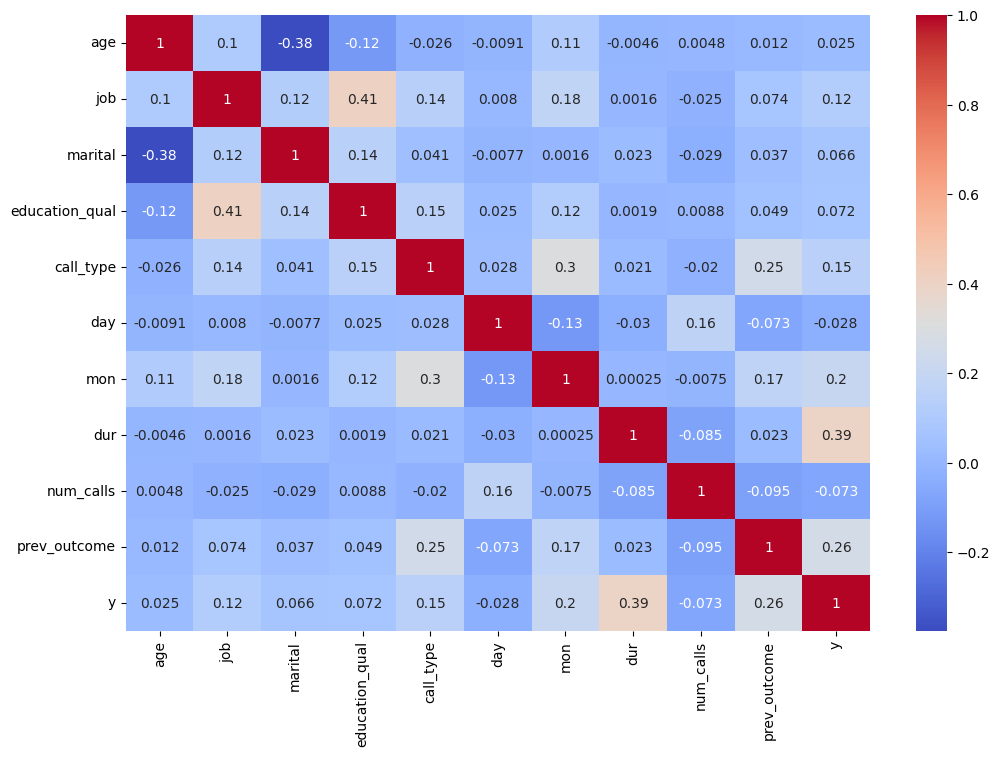

In [573]:
col = df.columns  # If you want to analyze all columns
df_heatmap = df[col].corr() 
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(df_heatmap, annot=True, cmap='coolwarm')  # Generate the heatmap with annotations
plt.show()

In [574]:

df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [575]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="y")
y = df.loc[:, "y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 10), (9043, 10), (36168,), (9043,))

In [576]:
y_train.value_counts()

y
0    31947
1     4221
Name: count, dtype: int64

Balancing the data

In [577]:
#IMBLEARN - SMOTE + ENN (OverSampling + Undersampling)
from imblearn.combine import SMOTEENN

cc = SMOTEENN(random_state=7)

X_train_smoteenn, y_train_smoteenn = cc.fit_resample(X_train, y_train)

In [578]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_smoteenn, y_train_smoteenn)
y_pred_lr_1 = lr.predict(X_test)


f1_lr1 = f1_score(y_test,y_pred_lr_1)


pred_probs_lr1= lr.predict_proba(X_test)
auc_score_lr1 = roc_auc_score(y_test, pred_probs_lr1[:,1])
y_pred_lr_1,auc_score_lr1,f1_lr1

d:\Final Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 0.8698169607739543,
 0.4293888761730373)

In [579]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smoteenn, y_train_smoteenn)

f1_score(y_test, model.predict(X_test)), model.score(X_test, y_test)

(0.5058788061501357, 0.8187548379962402)

In [580]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Loop through different depths to evaluate model performance
for depth in range(1, 40):  # Using range(1, 21) for depths 1 to 20
    model = DecisionTreeClassifier(max_depth=depth,random_state=42)  # Corrected class name
    model.fit(X_train_smoteenn, y_train_smoteenn)
    
    # Training score on the training set
    train_score = model.score(X_train_smoteenn, y_train_smoteenn)
    
    # Cross-validation score using 10-fold cross-validation
    cross_val = np.mean(cross_val_score(model, X_train_smoteenn, y_train_smoteenn, cv=10))
    
    # Print the results
    print(f"Depth - {depth}, TrainScore: {train_score:.4f}, Cross-ValScore: {cross_val:.4f}")

Depth - 1, TrainScore: 0.7842, Cross-ValScore: 0.7842
Depth - 2, TrainScore: 0.8026, Cross-ValScore: 0.8026
Depth - 3, TrainScore: 0.8556, Cross-ValScore: 0.8549
Depth - 4, TrainScore: 0.8641, Cross-ValScore: 0.8619
Depth - 5, TrainScore: 0.8702, Cross-ValScore: 0.8707
Depth - 6, TrainScore: 0.8912, Cross-ValScore: 0.8896
Depth - 7, TrainScore: 0.9044, Cross-ValScore: 0.9006
Depth - 8, TrainScore: 0.9165, Cross-ValScore: 0.9094
Depth - 9, TrainScore: 0.9294, Cross-ValScore: 0.9209
Depth - 10, TrainScore: 0.9362, Cross-ValScore: 0.9240
Depth - 11, TrainScore: 0.9447, Cross-ValScore: 0.9285
Depth - 12, TrainScore: 0.9541, Cross-ValScore: 0.9343
Depth - 13, TrainScore: 0.9612, Cross-ValScore: 0.9369
Depth - 14, TrainScore: 0.9695, Cross-ValScore: 0.9395
Depth - 15, TrainScore: 0.9772, Cross-ValScore: 0.9424
Depth - 16, TrainScore: 0.9832, Cross-ValScore: 0.9439
Depth - 17, TrainScore: 0.9884, Cross-ValScore: 0.9463
Depth - 18, TrainScore: 0.9926, Cross-ValScore: 0.9477
Depth - 19, TrainSc

In [581]:
model = DecisionTreeClassifier(random_state=42, max_depth=22)  # Corrected to max_depth
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and calculate the F1 score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print(f"F1 Score: {f1}")

F1 Score: 0.5058435720707222


In [582]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 3, max_features = "sqrt")

for n in [10, 20, 50, 100, 200, 500, 1000]:
  model = RandomForestClassifier(n_estimators = n, max_depth = 3, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model, X_train_smoteenn, y_train_smoteenn, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.86614555599639
N: 20, Cross-Val Score: 0.8670514740784254
N: 50, Cross-Val Score: 0.8757950174778873
N: 100, Cross-Val Score: 0.8736875591410087
N: 200, Cross-Val Score: 0.8761645357962647
N: 500, Cross-Val Score: 0.8782906116970107
N: 1000, Cross-Val Score: 0.8786048104258357


In [583]:
model = RandomForestClassifier(n_estimators = 500, max_depth = 3, max_features = "sqrt")
model.fit(X_train_smoteenn, y_train_smoteenn)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.6901470750857016, F1-Score: 0.4120856063785145


In [584]:
from xgboost import XGBClassifier

for lamb in [0.001, 0.002, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.05, 0.1, 0.2, 0.5, 1]:
  model = XGBClassifier(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train_smoteenn, y_train_smoteenn, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.001, Cross-Val Score: 0.564200683532512
Lambda: 0.002, Cross-Val Score: 0.8649807826963277
Lambda: 0.005, Cross-Val Score: 0.9047249859804414
Lambda: 0.006, Cross-Val Score: 0.9084406457506129
Lambda: 0.007, Cross-Val Score: 0.9118420008550137
Lambda: 0.008, Cross-Val Score: 0.9134502432961563
Lambda: 0.009, Cross-Val Score: 0.9144854454597304
Lambda: 0.01, Cross-Val Score: 0.9156870130531403
Lambda: 0.011, Cross-Val Score: 0.9162600943385588
Lambda: 0.012, Cross-Val Score: 0.9170919385743416
Lambda: 0.013, Cross-Val Score: 0.9181271475725573
Lambda: 0.014, Cross-Val Score: 0.919254791681831
Lambda: 0.015, Cross-Val Score: 0.9200681379599756
Lambda: 0.016, Cross-Val Score: 0.9209924070548536
Lambda: 0.017, Cross-Val Score: 0.921583955542023
Lambda: 0.018, Cross-Val Score: 0.9226006529133173
Lambda: 0.019, Cross-Val Score: 0.9234879568488065
Lambda: 0.02, Cross-Val Score: 0.9242828461771628
Lambda: 0.05, Cross-Val Score: 0.9388311088283408
Lambda: 0.1, Cross-Val Score: 0.94994

In [585]:
model1 = XGBClassifier(learning_rate = 1)
model1.fit(X_train, y_train)
print(f"Test data accuracy : {model1.score(X_test, y_test)}, F1-Score: {f1_score(model1.predict(X_test), y_test)}")

Test data accuracy : 0.8967156916952339, F1-Score: 0.5297079556898288


          Feature  Importance
9    prev_outcome    0.350079
7             dur    0.136959
6             mon    0.123222
4       call_type    0.119879
5             day    0.053637
0             age    0.045862
2         marital    0.044687
3  education_qual    0.042949
1             job    0.042511
8       num_calls    0.040217


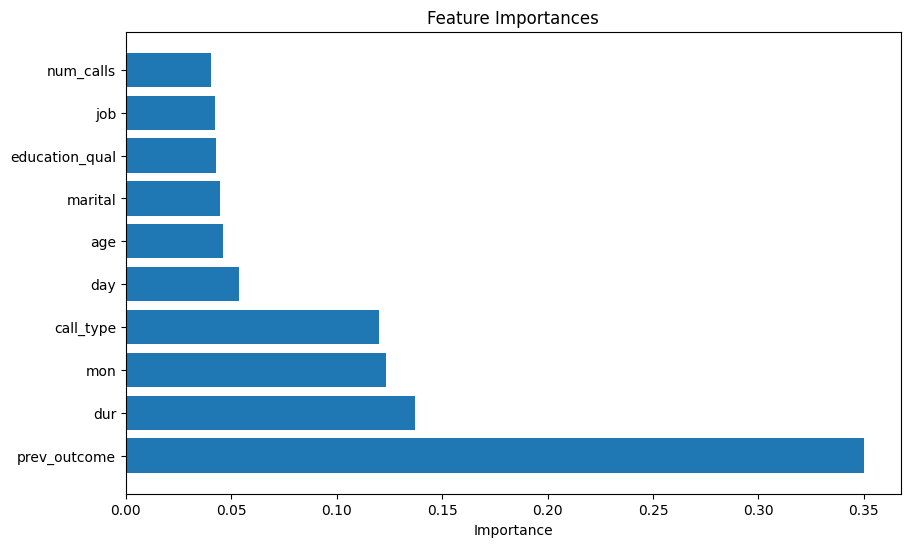

In [586]:

# Get feature importances
feature_importances = model1.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [587]:
predictions = model1.predict(X_test)  # Replace `X_test` with the input DataFrame

# 2. Create a DataFrame with original and predicted values
df_comparison = X_test.copy()  # Copy the input features for context
df_comparison['Original'] = y_test.values  # Add the original target values
df_comparison['Predicted'] = predictions  # Add the predicted values

# Display the DataFrame
df_comparison


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Original,Predicted
17991,35,3,0,1,2,30,1,153,2,0,0,0
39470,35,8,2,3,2,25,0,265,1,0,0,1
10312,35,0,1,0,0,12,4,200,1,0,0,0
44392,48,2,2,0,2,3,5,113,2,1,1,0
1376,38,0,0,0,0,8,0,238,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4943,39,10,0,3,0,21,0,786,2,0,0,0
36277,59,6,0,3,2,11,0,89,1,0,0,0
37619,31,7,2,1,2,14,0,291,1,2,0,0
29234,41,8,0,1,2,2,6,154,2,2,0,0


In [588]:
df_comparison.Predicted.value_counts()

Predicted
0    8125
1     918
Name: count, dtype: int64

In [589]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
model = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and evaluate
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score (KNN): {f1}")

F1 Score (KNN): 0.4166254329539832


In [590]:
from sklearn.svm import SVC

# Train SVM model
model = SVC(random_state=42)
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and evaluate
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score (SVM): {f1}")

F1 Score (SVM): 0.40790616854908773


In [591]:
import pickle
# Save the trained model to a file
with open('trained_classification_model.pkl', 'wb') as file:
    pickle.dump(model1, file)

In [592]:
import pickle
# Save the trained model to a file
with open('train.pkl', 'wb') as file:
    pickle.dump(df, file)

In [593]:
df.describe()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.739488,0.680963,1.477937,1.359758,15.806419,2.856163,258.163080,2.763841,0.290062,0.116985
std,10.618762,3.384906,0.884908,1.068177,0.897951,8.322476,2.715320,257.527812,3.098021,0.698469,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,1.000000,0.000000,8.000000,0.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,4.000000,0.000000,1.000000,2.000000,16.000000,3.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,8.000000,2.000000,3.000000,2.000000,21.000000,5.000000,319.000000,3.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,3.000000,1.000000
